In [1]:
!pip install colab_ssh --upgrade

In [2]:
from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared(password="**")

# Custom dataset

In [4]:
import torch
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [17]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self,x_data,y_data):
        self.x_data=x_data
        self.y_data=y_data
    
    def __len__(self):
        return len(self.y_data)
    
    def __getitem__(self,idx):
        x=torch.FloatTensor(self.x_data[idx])
        y=torch.FloatTensor(self.y_data[idx])
        return x,y

In [18]:
data_x=np.linspace(1.0,10.0,100)[:,np.newaxis]
data_y=np.sin(data_x)+0.1*np.power(data_x,2)+0.5*np.random.randn(100,1)

In [19]:
dataset=MyDataset(data_x,data_y)
dataloader=DataLoader(dataset,batch_size=2,shuffle=True)

In [20]:
model=torch.nn.Linear(1,1)
optimizer=torch.optim.SGD(model.parameters(),lr=1e-5)

In [21]:
nb_epochs=20
for epoch in range(nb_epochs+1):
    for batch_idx,samples in enumerate(dataloader):
        x_train,y_train=samples
        prediction=model(x_train)
        
        cost=F.mse_loss(prediction,y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print(f'Epoch {epoch}/{nb_epochs} Batch {batch_idx+1}/{len(dataloader)} Cost:{cost.item()}')

Epoch 0/20 Batch 1/50 Cost:114.4737548828125
Epoch 0/20 Batch 2/50 Cost:81.87409973144531
Epoch 0/20 Batch 3/50 Cost:69.75040435791016
Epoch 0/20 Batch 4/50 Cost:99.53414916992188
Epoch 0/20 Batch 5/50 Cost:112.9110107421875
Epoch 0/20 Batch 6/50 Cost:79.1791763305664
Epoch 0/20 Batch 7/50 Cost:2.2462286949157715
Epoch 0/20 Batch 8/50 Cost:6.533727169036865
Epoch 0/20 Batch 9/50 Cost:59.38195037841797
Epoch 0/20 Batch 10/50 Cost:109.53778839111328
Epoch 0/20 Batch 11/50 Cost:92.35694122314453
Epoch 0/20 Batch 12/50 Cost:101.08607482910156
Epoch 0/20 Batch 13/50 Cost:142.71722412109375
Epoch 0/20 Batch 14/50 Cost:124.79623413085938
Epoch 0/20 Batch 15/50 Cost:8.059532165527344
Epoch 0/20 Batch 16/50 Cost:5.540895462036133
Epoch 0/20 Batch 17/50 Cost:67.29132080078125
Epoch 0/20 Batch 18/50 Cost:44.15732955932617
Epoch 0/20 Batch 19/50 Cost:39.04767608642578
Epoch 0/20 Batch 20/50 Cost:12.943765640258789
Epoch 0/20 Batch 21/50 Cost:68.06517028808594
Epoch 0/20 Batch 22/50 Cost:89.9342651

# Image to Tensor

In [22]:
from PIL import Image
import numpy as np
import os
os.getcwd() # 현재 이 파일이 들어있는 폴더

'/content'

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
PATH=os.path.join('/content','drive','MyDrive','Colab Notebooks','images','3.png')

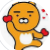

In [26]:
img=Image.open(PATH)
img

In [27]:
np_img_array=np.array(img.getdata())
np_img_array.shape

(2500, 4)

In [28]:
from torchvision import transforms as transforms 

res=transforms.ToTensor()(img)

In [31]:
res.shape # chanel,vert,hori

torch.Size([4, 50, 50])

In [32]:
img_array=transforms.ToPILImage()(res).convert('RGB')
img_array.size

(50, 50)

In [33]:
type(img_array)

PIL.Image.Image

# MNIST

https://github.com/pytorch/vision/blob/b2cf6045d36e400ad43931a0f47512387c6f8693/torchvision/datasets/vision.py#L7
https://github.com/pytorch/vision/blob/b2cf6045d36e400ad43931a0f47512387c6f8693/torchvision/datasets/mnist.py

In [34]:
!wget "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"

--2021-02-01 13:31:31--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  11.4MB/s    in 0.8s    

2021-02-01 13:31:32 (11.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]



In [35]:
!gunzip train-images-idx3-ubyte.gz

In [43]:
!pip3 install idx2numpy

Processing /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d/idx2numpy-1.2.3-cp36-none-any.whl


In [44]:
import idx2numpy

In [45]:
import numpy as np
file='train-images-idx3-ubyte'
arr=idx2numpy.convert_from_file(file)

In [46]:
arr.shape # arr는 일종의 pickle 파일 같은 것

(60000, 28, 28)